In [1]:
%config InlineBackend.figure_format = 'retina'

# Testing Enviornment

In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [1]:
%run ../test/test_algorithms.py

SyntaxError: invalid syntax (test_algorithms.py, line 8)

In [4]:
%run ../test/test_dataloader.py

...............
----------------------------------------------------------------------
Ran 15 tests in 0.033s

OK


In [5]:
%run ../test/test_predictorsI.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.020s

OK


In [6]:
%run ../test/test_predictorsII.py

.
----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


In [7]:
%run ../test/test_activate.py

...
----------------------------------------------------------------------
Ran 3 tests in 0.006s

OK


## Running example of the system

In [ ]:
%run ../consensus/algorithms.py

In [6]:
%run ../tools/dataloader.py

In [7]:
test = DataLoader('aapl', '2009-01-01', '2010-02-10')

In [8]:
prices = test.get_close()

In [9]:
prices

,Close
Date,
2009-01-02,3.241071
2009-01-05,3.377857
2009-01-06,3.322143
2009-01-07,3.250357
2009-01-08,3.310714
...,...
2010-02-04,6.858929
2010-02-05,6.980714
2010-02-08,6.932857


In [ ]:
#prices = np.array(prices)
#len(prices)

In [ ]:
prices

In [ ]:
%run ../tools/predictorsI.py

In [ ]:
op0 = BasicUnivariatePredictor(prices, 24, 30)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [ ]:
op0.create_bilstm()

In [ ]:
op0.model_blueprint()

In [ ]:
op0.fit_model(150)

In [ ]:
op0.show_performance()

In [ ]:
op0.save_model()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op0.predict(oyea)
nice

In [ ]:
op1.create_lstm()

In [ ]:
op1.model_blueprint()

In [ ]:
op1.fit_model(10)

In [ ]:
op1.show_performance()

In [ ]:
nice = op1.predict(oyea)
nice

In [ ]:
op2.create_cnn()

In [ ]:
op2.model_blueprint()

In [ ]:
op2.fit_model(10)

In [ ]:
op2.show_performance()

In [ ]:
nice = op2.predict(oyea)
nice

In [ ]:
op3.create_mlp()

In [ ]:
op3.model_blueprint()

In [ ]:
op3.fit_model(100)

In [ ]:
op3.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op3.predict(oyea)
nice

In [10]:
%run ../tools/predictorsII.py

In [11]:
oo = UnivariatePredictorII(prices, 7)

In [12]:
oo.fit_neural_model(100,"D")

INFO: nprophet.utils - set_auto_seasonalities: Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 5.34E-01
Epoch[100/100]: 100%|█| 100/100 [00:05<00:00, 17.18it/s, SmoothL1Loss=0.000654, MAE=0.145, RegLoss=0, MAE_val=0.752, Sm


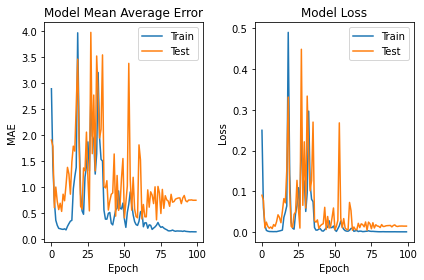

In [13]:
oo.show_performance_neural()

In [ ]:
oo.predict_neural()

In [ ]:
oo.fit_prophet_model()

In [ ]:
oo.show_performance_prophet()

In [ ]:
oo.predict_prophet()

In [ ]:
%run ../tools/predictorsIII.py

In [ ]:
len(prices)

In [ ]:
op4 = HybridUnivariatePredictor(prices,2, 24, 7)

In [ ]:
op4.create_cnnlstm()

In [ ]:
op4.model_blueprint()

In [ ]:
op4.fit_model(10)

In [ ]:
op4.show_performance()

In [ ]:
oyea = prices[-25:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op4.predict(oyea)
nice
#noice = pd.DataFrame(nice, columns=['yea'])
#noice = nice.reshape(20, 1)
#noice = pd.DataFrame(noice, columns=['yea'])

In [ ]:
nice.plot()

## Whole system test - I am alive v.3

In [1]:
%run ../tools/dataloader.py
%run ../system/activate.py

In [ ]:
training = DataLoader('aapl', '2009-01-01', '2010-05-01')

In [ ]:
training = training.get_close()